### 1- import dataset

In [33]:
import pandas as pd

# Charger le dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\Study\Aoudjit\dataset\kaggle_Interests_group.csv")

# Aperçu du dataset
print(df.head())

  group  grand_tot_interests  interest1  interest2  interest3  interest4  \
0     C                   17        NaN        NaN        NaN        NaN   
1     C                   43        1.0        NaN        NaN        NaN   
2     C                   27        NaN        NaN        NaN        NaN   
3     C                   34        NaN        NaN        NaN        NaN   
4     C                   36        NaN        NaN        NaN        NaN   

   interest5  interest6  interest7  interest8  ...  interest208  interest209  \
0        NaN        NaN        NaN        NaN  ...          NaN          NaN   
1        1.0        NaN        NaN        NaN  ...          NaN          NaN   
2        NaN        NaN        NaN        NaN  ...          NaN          NaN   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        1.0        NaN        NaN        NaN  ...          NaN          NaN   

   interest210  interest211  interest212  interest213  interes

In [34]:
# Remplacer les valeurs NaN par 0

data_cleaned = df.iloc[:, 2:].fillna(0)

###  Réduction de la dimensionnalité

In [35]:
from sklearn.decomposition import PCA

# Réduction à 2 ou 3 dimensions pour visualisation (ou plus si nécessaire)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_cleaned)

# Vérifier la variance expliquée par les composantes principales
print(pca.explained_variance_ratio_)


[0.21031967 0.10434786]


##### Choisir le nombre de clusters (méthode du coude)

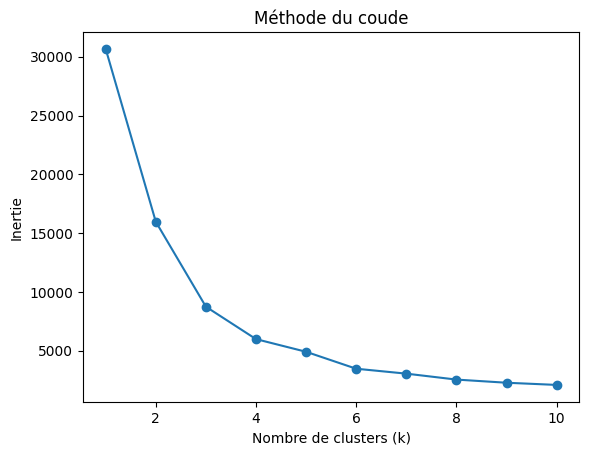

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_reduced)  # Utilise les données réduites ou normalisées
    inertia.append(kmeans.inertia_)

plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

##### Appliquer K-Means

In [37]:
# Appliquer K-means
k = 3  # Exemple basé sur la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_reduced)

# Ajouter les labels de cluster au dataset
data_cleaned["Cluster"] = kmeans.labels_
print(data_cleaned.head())


   interest1  interest2  interest3  interest4  interest5  interest6  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        1.0        0.0        0.0        0.0        1.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        1.0        0.0   

   interest7  interest8  interest9  interest10  ...  interest209  interest210  \
0        0.0        0.0        0.0         0.0  ...          0.0          0.0   
1        0.0        0.0        0.0         0.0  ...          0.0          1.0   
2        0.0        0.0        0.0         0.0  ...          0.0          1.0   
3        0.0        0.0        0.0         0.0  ...          0.0          0.0   
4        0.0        0.0        0.0         0.0  ...          0.0          1.0   

   interest211  interest212  interest213  interest214  interest215  \
0          0.0  

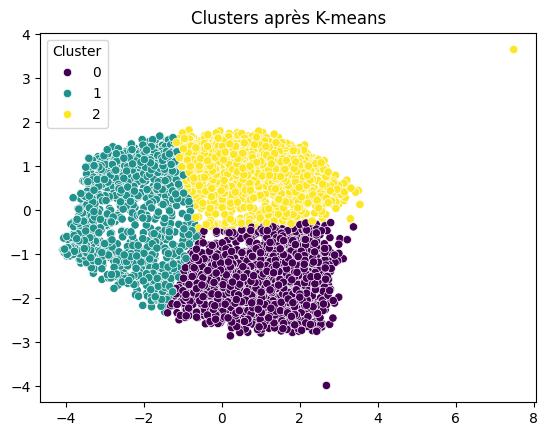

In [38]:
import seaborn as sns

sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=data_cleaned["Cluster"], palette="viridis")
plt.title("Clusters après K-means")
plt.show()
